In [35]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [37]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [38]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [39]:
data.shape

(400, 9)

In [40]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [41]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
#if Chance of Admit >= 0.75 ===> 1 else 0
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
data['Chance of Admit '] = bi.fit_transform(data[['Chance of Admit ']])

In [43]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [44]:
x = data.drop('Chance of Admit ', axis = 1)
y = data['Chance of Admit ']

In [45]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [46]:
#Changes float to int 
y = y.astype('int')   #series class method

In [47]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

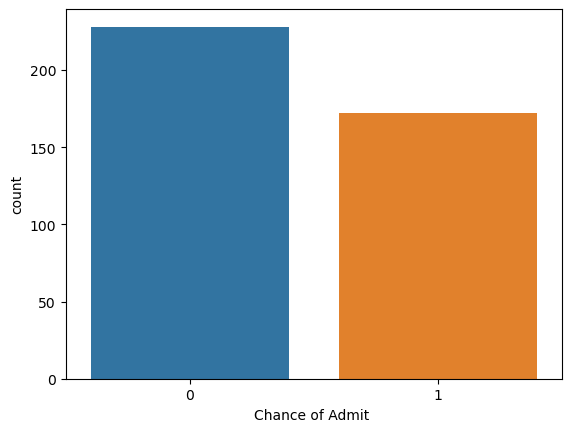

In [48]:
sns.countplot(x=y)

In [51]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [52]:
#Cross-Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [53]:
x_train.shape

(300, 8)

In [54]:
x_test.shape

(100, 8)

In [55]:
#Import the class
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [58]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

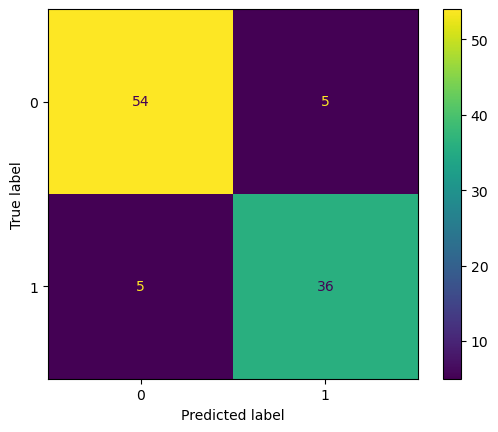

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [62]:
accuracy_score(y_test, y_pred)

0.9

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [75]:
#predict for new values
new = [[240,100,90,3,3.0,3.5,9.11,0]]
classifier.predict(new)[0]

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [76]:
#Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [89]:
plt.figure(figsize=(140,80))
plot_tree(classifier, fontsize=40, filled=True, rounded=True, feature_names = x.columns,
         class_names=['NA','AD']);